## Imports

In [334]:
!pip install mplsoccer
!pip install statsbombpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [335]:
# Imports
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsbombpy import sb
from mplsoccer import Pitch, VerticalPitch, add_image
from google.colab import files
from skimage import io

## Custom Font

In [336]:
import matplotlib.font_manager as font_manager

my_font = ['/content/ComingSoon-Regular.ttf']

!mv "ComingSoon-Regular.ttf" "/usr/share/fonts/truetype"

path = '/usr/share/fonts/truetype/ComingSoon-Regular.ttf'

font_title = font_manager.FontProperties(fname=path, size= 60, weight='bold')
font_score = font_manager.FontProperties(fname=path, size= 32, weight='bold')
font_logo = font_manager.FontProperties(fname=path, size= 56, weight='bold')
font_info_text = font_manager.FontProperties(fname=path, size= 40)
font_info = font_manager.FontProperties(fname=path, size= 48)
font_legend = font_manager.FontProperties(fname=path, size= 28)

mv: cannot stat 'ComingSoon-Regular.ttf': No such file or directory


In [337]:
#import matplotlib.font_manager as font_manager

#my_font = ['/content/ArchitectsDaughter-Regular.ttf']

#!mv "ArchitectsDaughter-Regular.ttf" "/usr/share/fonts/truetype"

#path = '/usr/share/fonts/truetype/ArchitectsDaughter-Regular.ttf'

#font_title = font_manager.FontProperties(fname=path, size= 14, weight='bold')
#font_score = font_manager.FontProperties(fname=path, size= 14, weight='bold')
#font_logo = font_manager.FontProperties(fname=path, size= 14, weight='bold')
#font_info_text = font_manager.FontProperties(fname=path, size= 14)
#font_info = font_manager.FontProperties(fname=path, size= 14)

## Load in the data

In [338]:
sb.competitions()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2022-12-01T11:42:34.874323,2021-06-13T16:17:31.694,None,2022-12-01T11:42:34.874323
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
7,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473
9,16,21,Europe,Champions League,male,False,False,2009/2010,2022-11-15T17:26:10.871011,2021-06-13T16:17:31.694,None,2022-11-15T17:26:10.871011


In [339]:
matches = sb.matches(competition_id=16, season_id=23)
matches.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,18237,2012-05-19,20:45:00.000,Europe - Champions League,2011/2012,Bayern Munich,Chelsea,1,1,available,...,2021-06-13T16:17:31.694,1,Final,Allianz Arena,Pedro Proença,Josef Heynckes,Roberto Di Matteo,1.0.3,None,None


## Chelsea Lineup

In [340]:
chelsea_lineup = sb.lineups(match_id=18237)["Chelsea"]
chelsea_lineup = pd.DataFrame(sb.lineups(match_id=18237)["Chelsea"])
chelsea_lineup

,player_id,player_name,player_nickname,jersey_number,country,cards,positions
0,3272,Oriol Romeu Vidal,Oriol Romeu,6,Spain,[],[]
1,3294,Juan Manuel Mata García,Juan Mata,10,Spain,[],"[{'position_id': 19, 'position': 'Center Attac..."
2,3461,Petr Čech,None,1,Czech Republic,[],"[{'position_id': 1, 'position': 'Goalkeeper', ..."
3,3529,Daniel Andre Sturridge,Daniel Sturridge,23,England,[],[]
4,3645,Gary Cahill,None,24,England,[],"[{'position_id': 5, 'position': 'Left Center B..."
5,3956,David Luiz Moreira Marinho,David Luiz,4,Brazil,"[{'time': '85:05', 'card_type': 'Yellow Card',...","[{'position_id': 3, 'position': 'Right Center ..."
6,5475,John Michael Nchekwube Obinna,John Obi Mikel,12,Nigeria,[],"[{'position_id': 9, 'position': 'Right Defensi..."
7,6382,Fernando José Torres Sanz,Fernando Torres,9,Spain,"[{'time': '11:58', 'card_type': 'Yellow Card',...","[{'position_id': 17, 'position': 'Right Wing',..."
8,8575,Salomon Armand Magloire Kalou,Salomon Kalou,21,Côte d'Ivoire,[],"[{'position_id': 17, 'position': 'Right Wing',..."
9,12529,Ashley Cole,None,3,England,"[{'time': '80:49', 'card_type': 'Yellow Card',...","[{'position_id': 6, 'position': 'Left Back', '..."


In [341]:
np.array(chelsea_lineup['positions'])

array([list([]),
       list([{'position_id': 19, 'position': 'Center Attacking Midfield', 'from': '00:00', 'to': None, 'from_period': 1, 'to_period': None, 'start_reason': 'Starting XI', 'end_reason': 'Final Whistle'}]),
       list([{'position_id': 1, 'position': 'Goalkeeper', 'from': '00:00', 'to': None, 'from_period': 1, 'to_period': None, 'start_reason': 'Starting XI', 'end_reason': 'Final Whistle'}]),
       list([]),
       list([{'position_id': 5, 'position': 'Left Center Back', 'from': '00:00', 'to': '112:21', 'from_period': 1, 'to_period': 4, 'start_reason': 'Starting XI', 'end_reason': 'Player Off'}, {'position_id': 3, 'position': 'Right Center Back', 'from': '112:31', 'to': None, 'from_period': 4, 'to_period': None, 'start_reason': 'Player On', 'end_reason': 'Final Whistle'}]),
       list([{'position_id': 3, 'position': 'Right Center Back', 'from': '00:00', 'to': '17:40', 'from_period': 1, 'to_period': 1, 'start_reason': 'Starting XI', 'end_reason': 'Tactical Shift'}, {'po

In [342]:
# Chelsea players who played at any point in the match
chelsea_played = chelsea_lineup[chelsea_lineup.positions.str.len()>0]

# Chelsea players who started the match
chelsea_started_list = []
for index, row in chelsea_played.iterrows():
  if row['positions'][0]['from'] == '00:00':
    chelsea_started_list.append(row['player_id'])

chelsea_started = chelsea_played[chelsea_played['player_id'].isin(chelsea_started_list)]
chelsea_started

,player_id,player_name,player_nickname,jersey_number,country,cards,positions
1,3294,Juan Manuel Mata García,Juan Mata,10,Spain,[],"[{'position_id': 19, 'position': 'Center Attac..."
2,3461,Petr Čech,None,1,Czech Republic,[],"[{'position_id': 1, 'position': 'Goalkeeper', ..."
4,3645,Gary Cahill,None,24,England,[],"[{'position_id': 5, 'position': 'Left Center B..."
5,3956,David Luiz Moreira Marinho,David Luiz,4,Brazil,"[{'time': '85:05', 'card_type': 'Yellow Card',...","[{'position_id': 3, 'position': 'Right Center ..."
6,5475,John Michael Nchekwube Obinna,John Obi Mikel,12,Nigeria,[],"[{'position_id': 9, 'position': 'Right Defensi..."
8,8575,Salomon Armand Magloire Kalou,Salomon Kalou,21,Côte d'Ivoire,[],"[{'position_id': 17, 'position': 'Right Wing',..."
9,12529,Ashley Cole,None,3,England,"[{'time': '80:49', 'card_type': 'Yellow Card',...","[{'position_id': 6, 'position': 'Left Back', '..."
11,20018,José Bosingwa da Silva,José Bosingwa,17,Portugal,[],"[{'position_id': 2, 'position': 'Right Back', ..."
12,20045,Ryan Bertrand,None,34,England,[],"[{'position_id': 21, 'position': 'Left Wing', ..."
14,20330,Frank Lampard,None,8,England,[],"[{'position_id': 11, 'position': 'Left Defensi..."


Text(40, 55, '11')

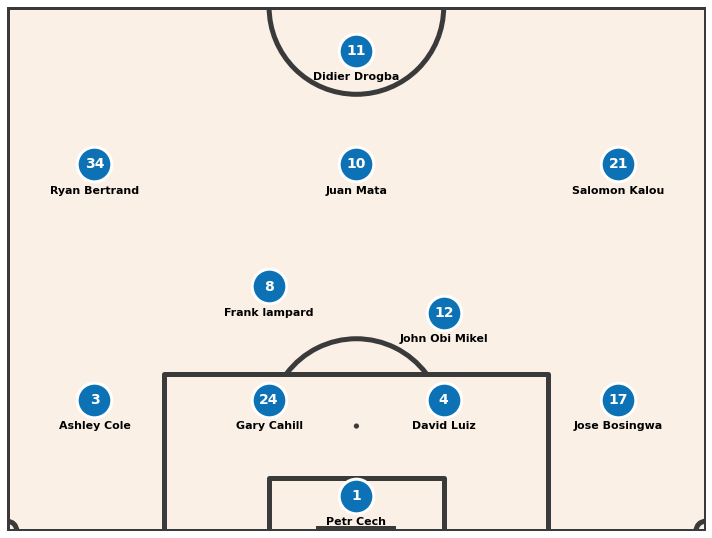

In [343]:
pitch = VerticalPitch(half=True, corner_arcs=True, goal_type='line', 
                      pad_bottom=60, pad_top=-60, pad_left=0, pad_right=0,
                      pitch_color = '#FAF0E6', line_color='#3A3A3A', linewidth=5)
fig, ax = pitch.draw(figsize=(10, 10))

node_colour = '#0D72B5'
edge_colour= 'white'
node_size = 1200
text_colour='#000000'

player_1_node = pitch.scatter(4, 40, s=node_size, color=node_colour, edgecolors=edge_colour, linewidth=3, alpha=1, ax=ax)
player_2_node = pitch.scatter(15, 70, s=node_size, color=node_colour, edgecolors=edge_colour, linewidth=3, alpha=1, ax=ax)
player_3_node = pitch.scatter(15, 50, s=node_size, color=node_colour, edgecolors=edge_colour, linewidth=3, alpha=1, ax=ax)
player_4_node = pitch.scatter(15, 30, s=node_size, color=node_colour, edgecolors=edge_colour, linewidth=3, alpha=1, ax=ax)
player_5_node = pitch.scatter(15, 10, s=node_size, color=node_colour, edgecolors=edge_colour, linewidth=3, alpha=1, ax=ax)
player_6_node = pitch.scatter(28, 30, s=node_size, color=node_colour, edgecolors=edge_colour, linewidth=3, alpha=1, ax=ax)
player_7_node = pitch.scatter(25, 50, s=node_size, color=node_colour, edgecolors=edge_colour, linewidth=3, alpha=1, ax=ax)
player_8_node = pitch.scatter(42, 40, s=node_size, color=node_colour, edgecolors=edge_colour, linewidth=3, alpha=1, ax=ax)
player_9_node = pitch.scatter(42, 10, s=node_size, color=node_colour, edgecolors=edge_colour, linewidth=3, alpha=1, ax=ax)
player_10_node = pitch.scatter(42, 70, s=node_size, color=node_colour, edgecolors=edge_colour, linewidth=3, alpha=1, ax=ax)
player_11_node = pitch.scatter(55, 40, s=node_size, color=node_colour, edgecolors=edge_colour, linewidth=3, alpha=1, ax=ax)

pitch.annotate('Petr Cech', xy=(1, 40), c=text_colour, va='center', ha='center', size=11, weight='bold', ax=ax)
pitch.annotate('Ashley Cole', xy=(12, 10), c=text_colour, va='center', ha='center', size=11, weight='bold', ax=ax)
pitch.annotate('Gary Cahill', xy=(12, 30), c=text_colour, va='center', ha='center', size=11, weight='bold', ax=ax)
pitch.annotate('David Luiz', xy=(12, 50), c=text_colour, va='center', ha='center', size=11, weight='bold', ax=ax)
pitch.annotate('Jose Bosingwa', xy=(12, 70), c=text_colour, va='center', ha='center', size=11, weight='bold', ax=ax)
pitch.annotate('John Obi Mikel', xy=(22, 50), c=text_colour, va='center', ha='center', size=11, weight='bold', ax=ax)
pitch.annotate('Frank lampard', xy=(25, 30), c=text_colour, va='center', ha='center', size=11, weight='bold', ax=ax)
pitch.annotate('Juan Mata', xy=(39, 40), c=text_colour, va='center', ha='center', size=11, weight='bold', ax=ax)
pitch.annotate('Ryan Bertrand', xy=(39, 10), c=text_colour, va='center', ha='center', size=11, weight='bold', ax=ax)
pitch.annotate('Salomon Kalou', xy=(39, 70), c=text_colour, va='center', ha='center', size=11, weight='bold', ax=ax)
pitch.annotate('Didier Drogba', xy=(52, 40), c=text_colour, va='center', ha='center', size=11, weight='bold', ax=ax)

pitch.annotate('1', xy=(4, 40), c='white', va='center', ha='center', size=14, weight='bold', ax=ax)
pitch.annotate('3', xy=(15, 10), c='white', va='center', ha='center', size=14, weight='bold', ax=ax)
pitch.annotate('24', xy=(15, 30), c='white', va='center', ha='center', size=14, weight='bold', ax=ax)
pitch.annotate('4', xy=(15, 50), c='white', va='center', ha='center', size=14, weight='bold', ax=ax)
pitch.annotate('17', xy=(15, 70), c='white', va='center', ha='center', size=14, weight='bold', ax=ax)
pitch.annotate('12', xy=(25, 50), c='white', va='center', ha='center', size=14, weight='bold', ax=ax)
pitch.annotate('8', xy=(28, 30), c='white', va='center', ha='center', size=14, weight='bold', ax=ax)
pitch.annotate('10', xy=(42, 40), c='white', va='center', ha='center', size=14, weight='bold', ax=ax)
pitch.annotate('34', xy=(42, 10), c='white', va='center', ha='center', size=14, weight='bold', ax=ax)
pitch.annotate('21', xy=(42, 70), c='white', va='center', ha='center', size=14, weight='bold', ax=ax)
pitch.annotate('11', xy=(55, 40), c='white', va='center', ha='center', size=14, weight='bold', ax=ax)

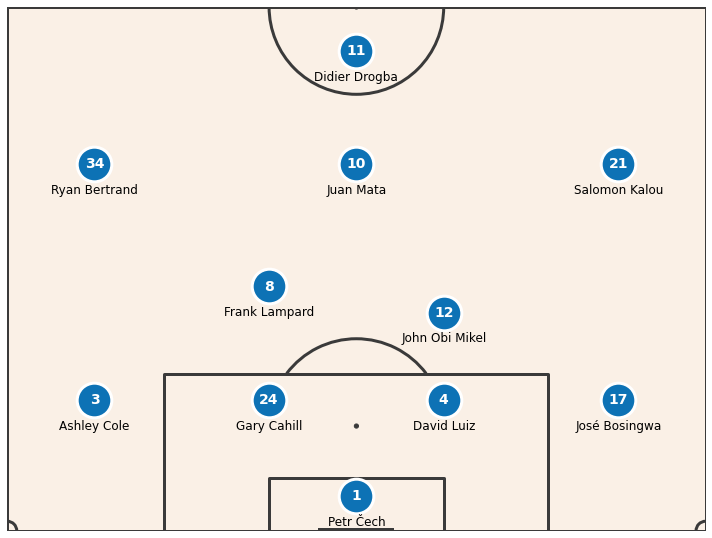

In [344]:
pitch = VerticalPitch(half=True, corner_arcs=True, goal_type='line', 
                      pad_bottom=60, pad_top=-60, pad_left=0, pad_right=0,
                      pitch_color = '#FAF0E6', line_color='#3A3A3A', linewidth=3)
fig, ax = pitch.draw(figsize=(10, 10))

node_colour = '#0D72B5'
edge_colour= 'white'
node_size = 1200

for index, row in chelsea_started.iterrows():
  if str(row["player_nickname"]) == 'None':
    player_name = row['player_name']
  else:
    player_name = row['player_nickname']
  shirt_number = row['jersey_number']

  if row['positions'][0]['position'] == 'Goalkeeper':
    pos_x = 4
    pos_y = 40
  elif row['positions'][0]['position'] == 'Right Back':
    pos_x = 15
    pos_y = 70
  elif row['positions'][0]['position'] == 'Right Center Back':
    pos_x = 15
    pos_y = 50
  elif row['positions'][0]['position'] == 'Left Center Back':
    pos_x = 15
    pos_y = 30
  elif row['positions'][0]['position'] == 'Left Back':
    pos_x = 15
    pos_y = 10
  elif row['positions'][0]['position'] == 'Right Defensive Midfield':
    pos_x = 25
    pos_y = 50
  elif row['positions'][0]['position'] == 'Left Defensive Midfield':
    pos_x = 28
    pos_y = 30
  elif row['positions'][0]['position'] == 'Left Wing':
    pos_x = 42
    pos_y = 10
  elif row['positions'][0]['position'] == 'Right Wing':
    pos_x = 42
    pos_y = 70
  elif row['positions'][0]['position'] == 'Center Attacking Midfield':
    pos_x = 42
    pos_y = 40
  elif row['positions'][0]['position'] == 'Center Forward':
    pos_x = 55
    pos_y = 40

  pitch.scatter(pos_x, pos_y, s=node_size, color=node_colour, edgecolors=edge_colour, linewidth=3, alpha=1, ax=ax)
  pitch.annotate(player_name, xy=(pos_x - 3, pos_y), c=text_colour, va='center', ha='center', size=12, ax=ax)
  pitch.annotate(shirt_number, xy=(pos_x, pos_y), c='white', va='center', ha='center', size=14, weight='bold', ax=ax)

## Chelsea Shot-map

In [345]:
events = sb.events(18237)
print(events.columns)

Index(['bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_recovery_failure', 'block_deflection', 'block_offensive',
       'carry_end_location', 'clearance_aerial_won', 'counterpress',
       'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun', 'duel_outcome',
       'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute',
       'miscontrol_aerial_won', 'off_camera', 'pass_aerial_won', 'pass_angle',
       'pass_assisted_shot_id', 'pass_backheel', 'pass_body_part',
       'pass_cross', 'pass_cut_back', 'pass_deflected', 'pass_end_location',
       'pass_goal_

In [346]:
# Split existing lcoation columns into x and y components

# location
events[['location_x', 'location_y']] = events['location'].apply(pd.Series)

# pass destination location
events[['pass_end_location_x', 'pass_end_location_y']] = events['pass_end_location'].apply(pd.Series)

# shot destination location
events[['shot_end_location_x', 'shot_end_location_y', 'shot_end_location_z']] = events['shot_end_location'].apply(pd.Series)

In [347]:
events_df = events[[
    'index', 'id', 'duration', 'match_id', 'minute', 'pass_angle',
    'pass_height', 'pass_height', 'pass_length', 'pass_outcome',
    'pass_recipient', 'pass_shot_assist', 'pass_goal_assist', 'period', 'play_pattern', 'player',
    'player_id', 'position', 'possession', 'possession_team', 
    'possession_team_id', 'shot_type', 'shot_outcome', 'team', 'timestamp', 
    'type', 'location_x', 'location_y', 'pass_end_location_x',
    'pass_end_location_y', 'shot_end_location_x', 'shot_end_location_y', 
    'shot_end_location_z', 'shot_statsbomb_xg'
]]

In [348]:
shots = events_df.loc[events_df['type'] == 'Shot'].set_index('id', 'match')

<ipython-input-348-463a68fab575>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only
  shots = events_df.loc[events_df['type'] == 'Shot'].set_index('id', 'match')


In [349]:
# Chelsea shots
chelsea_shots = shots.loc[shots['team'] == 'Chelsea']

# Non-penalty shootout chelsea shots
np_chelsea_shots = chelsea_shots.loc[chelsea_shots['shot_type'] != 'Penalty']

# Goals
goals = np_chelsea_shots.loc[np_chelsea_shots['shot_outcome'] == 'Goal']

In [350]:
# total shots
number_of_shots = len(np_chelsea_shots)

# total shots on target
on_target_shots = np_chelsea_shots.loc[(np_chelsea_shots['shot_outcome'] == 'Goal') |
                                       (np_chelsea_shots['shot_outcome'] == 'Saved')]

number_of_on_target_shots = len(on_target_shots)                     

# total xG
xG_list = []
for index, row in np_chelsea_shots.iterrows():
  xG_list.append(row['shot_statsbomb_xg'])
xG = sum(xG_list)

# xG per shot
xG_per_shot = xG/number_of_shots

In [351]:
np_chelsea_shots['shot_outcome']

id
0158e2bf-192f-4197-a2cf-8b7a3ae4a4f9      Off T
ada1b4f6-322c-487b-a20b-08af0be16c68      Saved
105b642e-5a6f-4275-a5cc-ab63595bcd5a      Off T
97735b78-9a0b-473a-a0f0-7ad6362109a3    Blocked
48479c5c-2ebf-4c49-a155-8a880bb51a1c      Saved
2c4fae73-a8be-4e14-83a4-53fed157de97       Goal
8346a447-8195-400e-9591-9490dac62783      Off T
12fe12a7-b911-4395-9a60-491d8248ee86    Blocked
e3b00b9a-caca-4ca2-b3d7-15bf02f581b5    Blocked
Name: shot_outcome, dtype: object

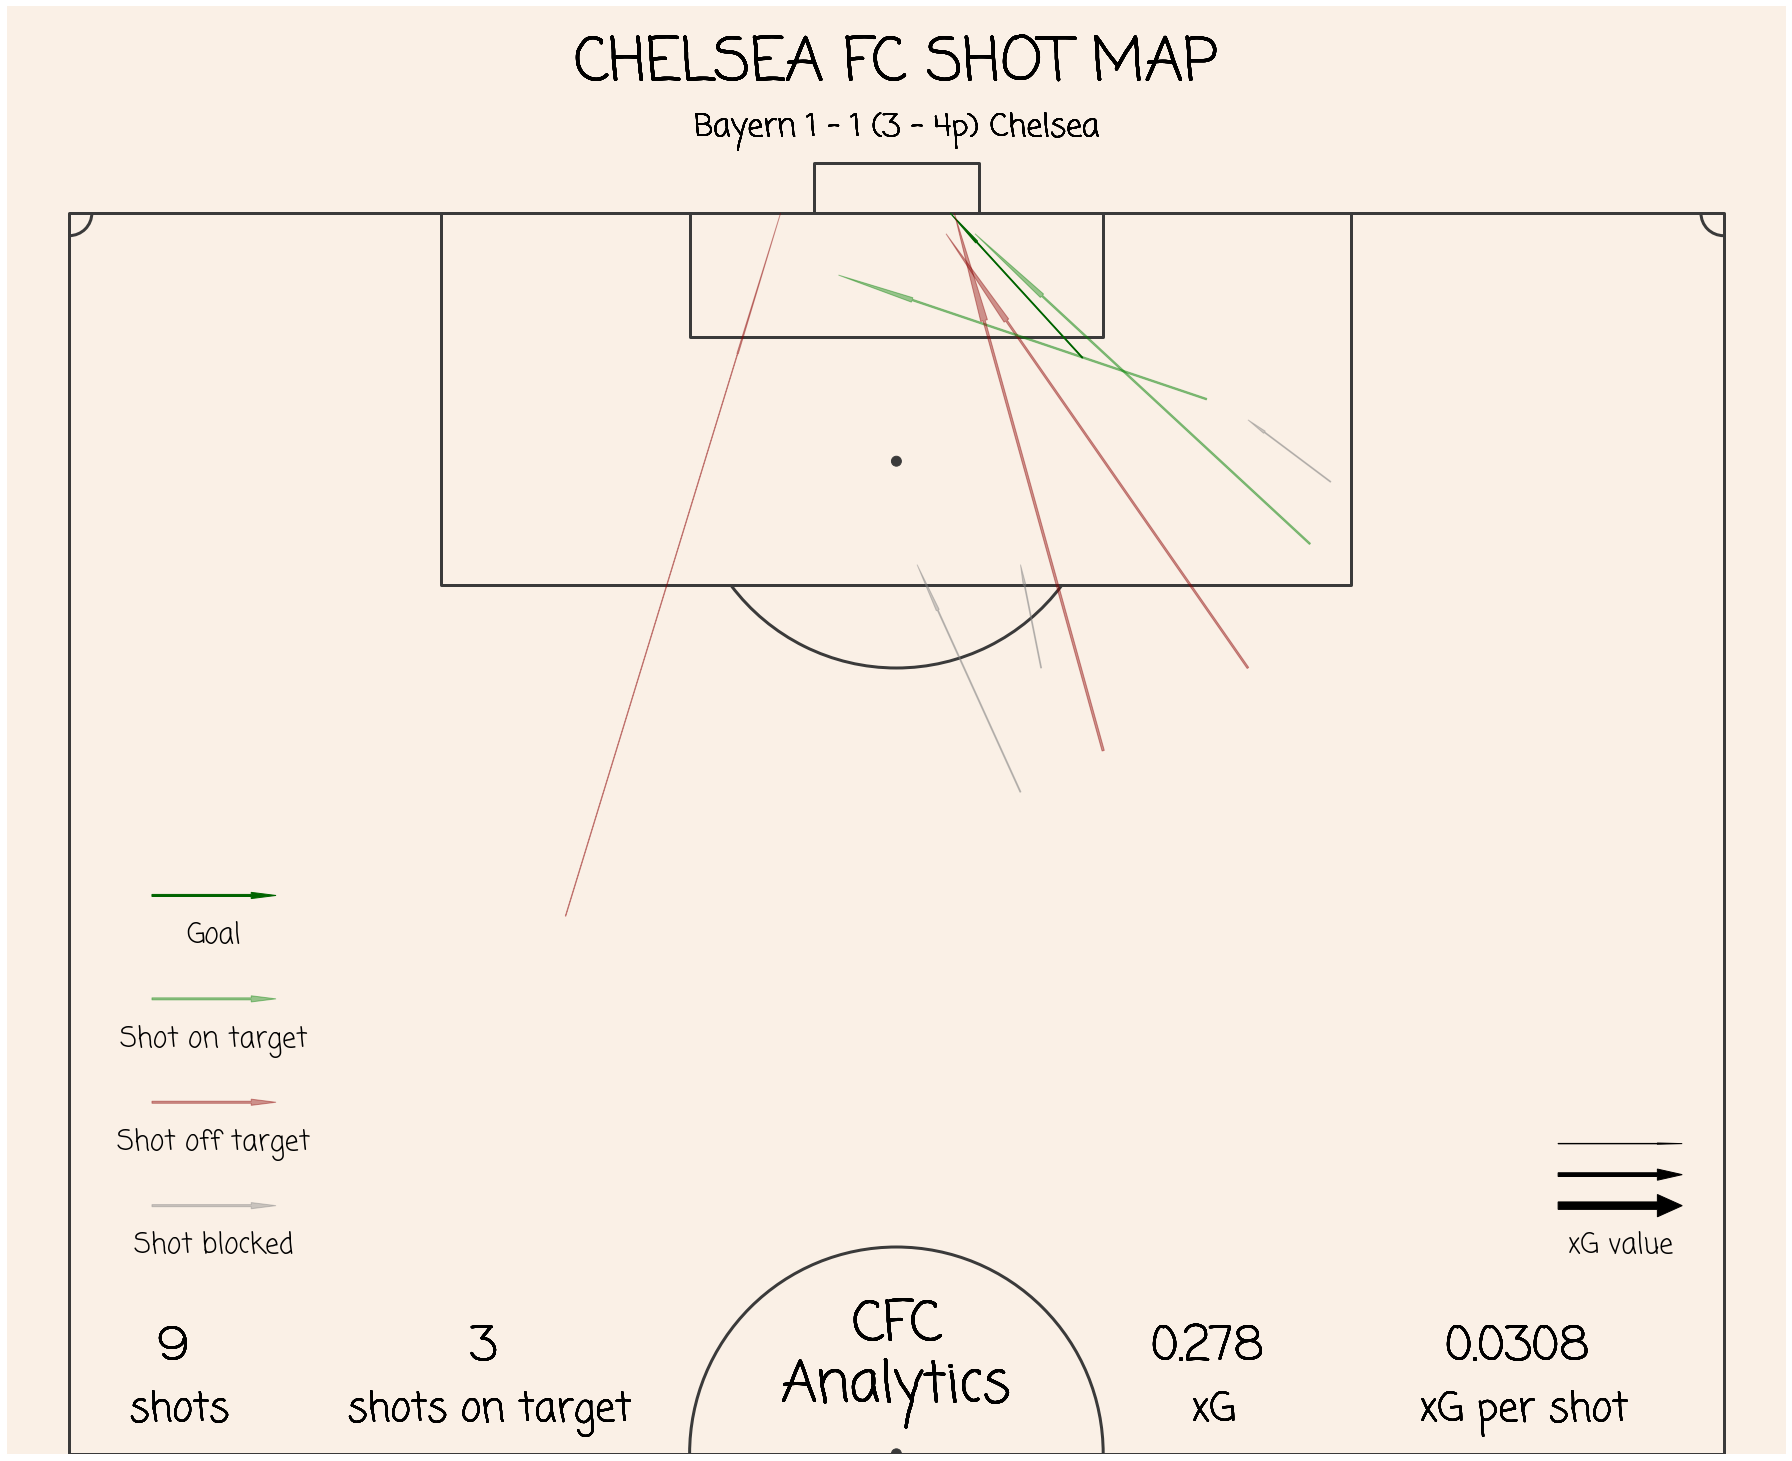

In [352]:
pitch_colour = '#FAF0E6'
line_colour = '#3A3A3A'
goal_colour = 'darkgreen'
shot_on_colour = 'green'
shot_off_colour = 'darkred'
shot_block_colour = 'grey'
text_colour = '#000000'

pitch = VerticalPitch(half=True, corner_arcs=True, goal_type='box', 
                      pad_bottom=0, pad_top=10, pad_left=3, pad_right=3,
                      pitch_color = pitch_colour, line_color = line_colour, linewidth=3)
fig, ax = pitch.draw(figsize=(25, 25))

plt.rcParams['font.family'] = 'ArchitectsDaughter-Regular'

for index, row in np_chelsea_shots.iterrows():
  x = row['location_y']
  y = row['location_x']
  dx = row['shot_end_location_y']
  dy = row['shot_end_location_x']
  arrow_width = row['shot_statsbomb_xg'] * 10

  if row['shot_outcome'] == 'Goal':
    shot_arrow = plt.Arrow(x, y, dx-x, dy-y, width=arrow_width, color=goal_colour)

  elif row['shot_outcome'] == 'Saved':
    shot_arrow = plt.Arrow(x, y, dx-x, dy-y, width=arrow_width, color=shot_on_colour, alpha=0.4)

  elif row['shot_outcome'] == 'Off T':
    shot_arrow = plt.Arrow(x, y, dx-x, dy-y, width=arrow_width, color=shot_off_colour, alpha=0.4)

  else:
     shot_arrow = plt.Arrow(x, y, dx-x, dy-y, width=arrow_width, color=shot_block_colour, alpha=0.4)

  ax.add_patch(shot_arrow)

  pitch.annotate('CHELSEA FC SHOT MAP', xy=(127, 40), c=text_colour, va='center', ha='center', weight='bold', ax=ax,fontproperties = font_title)
  
  pitch.annotate('Bayern 1 - 1 (3 - 4p) Chelsea', xy=(124, 40), c=text_colour, va='center', ha='center', weight='bold', ax=ax,fontproperties = font_score)

  pitch.annotate(str(number_of_shots), xy=(65, 5), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_info)
  pitch.annotate(' shots', xy=(62, 5), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_info_text)

  pitch.annotate(str(number_of_on_target_shots), xy=(65, 20), c=text_colour, va='center', ha='center', ax=ax,fontproperties = font_info)
  pitch.annotate(' shots on target', xy=(62, 20), c=text_colour, va='center', ha='center', ax=ax,fontproperties = font_info_text)

  pitch.annotate('%.3g' % (xG), xy=(65, 55), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_info)
  pitch.annotate(' xG', xy=(62, 55), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_info_text)

  pitch.annotate('%.3g' % (xG_per_shot), xy=(65, 70), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_info)
  pitch.annotate(' xG per shot', xy=(62, 70), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_info_text)

  pitch.annotate('CFC', xy=(66, 40), c=text_colour, va='center', ha='center', ax=ax,fontproperties = font_logo)
  pitch.annotate('Analytics', xy=(63, 40), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_logo)


goal_arrow = plt.Arrow(4, 87, 6, 0, width=0.5, color=goal_colour)
shot_on_arrow = plt.Arrow(4, 82, 6, 0, width=0.5, color=shot_on_colour, alpha=0.4)
shot_off_arrow = plt.Arrow(4, 77, 6, 0, width=0.5, color=shot_off_colour, alpha=0.4)
shot_block_arrow = plt.Arrow(4,72, 6, 0, width=0.5, color=shot_block_colour, alpha=0.4)
ax.add_patch(goal_arrow)
ax.add_patch(shot_on_arrow)
ax.add_patch(shot_off_arrow)
ax.add_patch(shot_block_arrow)

pitch.annotate('Goal', xy=(85, 7), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_legend)
pitch.annotate('Shot on target', xy=(80, 7), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_legend)
pitch.annotate('Shot off target', xy=(75, 7), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_legend)
pitch.annotate('Shot blocked', xy=(70, 7), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_legend)

low_xG_arrow = plt.Arrow(72, 75, 6, 0, width=0.1, color=text_colour)
medium_xG_arrow = plt.Arrow(72, 73.5, 6, 0, width=0.9, color=text_colour)
high_xG_arrow = plt.Arrow(72, 72, 6, 0, width=1.8, color=text_colour)
ax.add_patch(low_xG_arrow)
ax.add_patch(medium_xG_arrow)
ax.add_patch(high_xG_arrow)

pitch.annotate('xG value', xy=(70, 75), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_legend)

plt.show()

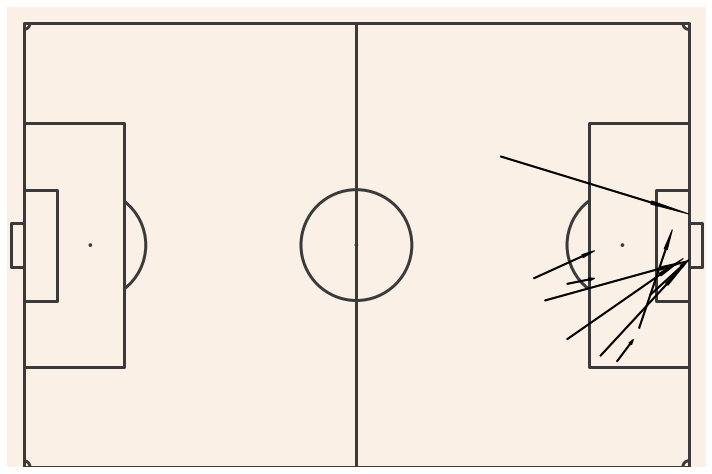

In [353]:
pitch = Pitch(corner_arcs=True, goal_type='box', 
                      pad_bottom=0, pad_top=3, pad_left=3, pad_right=3,
                      pitch_color = '#FAF0E6', line_color='#3A3A3A', linewidth=3)
fig, ax = pitch.draw(figsize=(10, 10))

for index, row in np_chelsea_shots.iterrows():
  x = row['location_x']
  y = row['location_y']
  dx = row['shot_end_location_x']
  dy = row['shot_end_location_y']
  shot_arrow = plt.Arrow(x, y, dx-x, dy-y, width=1, color=text_colour)
  ax.add_patch(shot_arrow)

plt.show()

## Bayern Shot-map

In [354]:
# Bayern Munich shots
bayern_munich_shots = shots.loc[shots['team'] == 'Bayern Munich']

# Non-penalty shootout Bayern Munich shots
np_bayern_munich_shots = bayern_munich_shots.loc[bayern_munich_shots['shot_type'] != 'Penalty']

# Goals
goals = np_bayern_munich_shots.loc[np_bayern_munich_shots['shot_outcome'] == 'Goal']

In [355]:
# total shots
number_of_shots = len(np_bayern_munich_shots)

# total shots on target
on_target_shots = np_bayern_munich_shots.loc[(np_bayern_munich_shots['shot_outcome'] == 'Goal') |
                                       (np_bayern_munich_shots['shot_outcome'] == 'Saved')]

number_of_on_target_shots = len(on_target_shots)                     

# total xG
xG_list = []
for index, row in np_bayern_munich_shots.iterrows():
  xG_list.append(row['shot_statsbomb_xg'])
xG = sum(xG_list)

# xG per shot
xG_per_shot = xG/number_of_shots

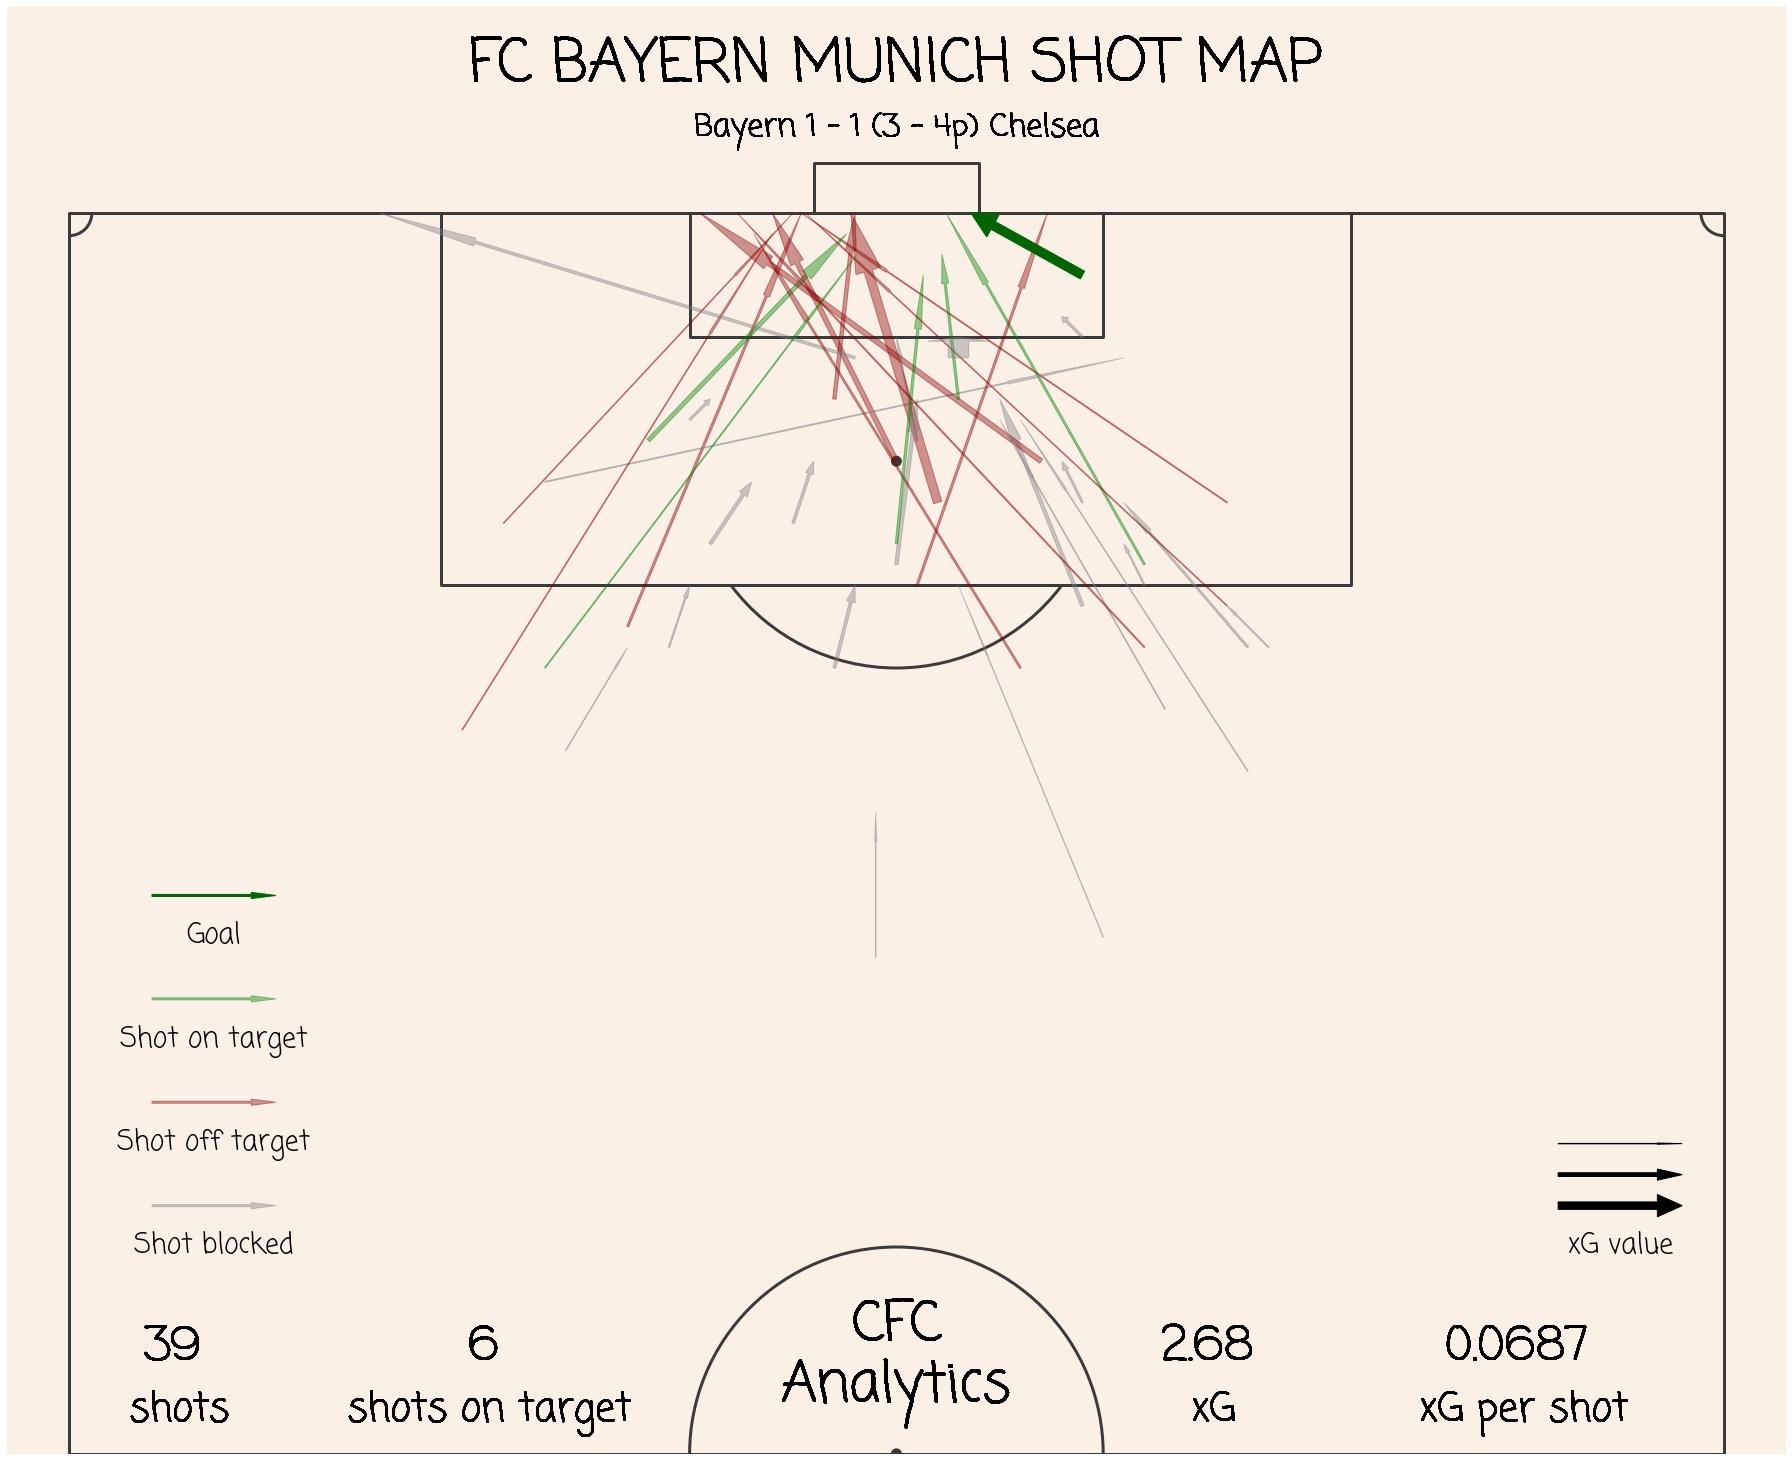

In [358]:
pitch_colour = '#FAF0E6'
line_colour = '#3A3A3A'
goal_colour = 'darkgreen'
shot_on_colour = 'green'
shot_off_colour = 'darkred'
shot_block_colour = 'grey'
text_colour = '#000000'

pitch = VerticalPitch(half=True, corner_arcs=True, goal_type='box', 
                      pad_bottom=0, pad_top=10, pad_left=3, pad_right=3,
                      pitch_color = pitch_colour, line_color = line_colour, linewidth=3)
fig, ax = pitch.draw(figsize=(25, 25))

plt.rcParams['font.family'] = 'ArchitectsDaughter-Regular'

for index, row in np_bayern_munich_shots.iterrows():
  x = row['location_y']
  y = row['location_x']
  dx = row['shot_end_location_y']
  dy = row['shot_end_location_x']
  arrow_width = row['shot_statsbomb_xg'] * 10

  if row['shot_outcome'] == 'Goal':
    shot_arrow = plt.Arrow(x, y, dx-x, dy-y, width=arrow_width, color=goal_colour)

  elif row['shot_outcome'] == 'Saved':
    shot_arrow = plt.Arrow(x, y, dx-x, dy-y, width=arrow_width, color=shot_on_colour, alpha=0.4)

  elif row['shot_outcome'] == 'Off T':
    shot_arrow = plt.Arrow(x, y, dx-x, dy-y, width=arrow_width, color=shot_off_colour, alpha=0.4)

  else:
     shot_arrow = plt.Arrow(x, y, dx-x, dy-y, width=arrow_width, color=shot_block_colour, alpha=0.4)

  ax.add_patch(shot_arrow)

  pitch.annotate('FC BAYERN MUNICH SHOT MAP', xy=(127, 40), c=text_colour, va='center', ha='center', ax=ax,fontproperties = font_title)
  
  pitch.annotate('Bayern 1 - 1 (3 - 4p) Chelsea', xy=(124, 40), c=text_colour, va='center', ha='center',  ax=ax,fontproperties = font_score)

  pitch.annotate(str(number_of_shots), xy=(65, 5), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_info)
  pitch.annotate(' shots', xy=(62, 5), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_info_text)

  pitch.annotate(str(number_of_on_target_shots), xy=(65, 20), c=text_colour, va='center', ha='center', ax=ax,fontproperties = font_info)
  pitch.annotate(' shots on target', xy=(62, 20), c=text_colour, va='center', ha='center', ax=ax,fontproperties = font_info_text)

  pitch.annotate('%.3g' % (xG), xy=(65, 55), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_info)
  pitch.annotate(' xG', xy=(62, 55), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_info_text)

  pitch.annotate('%.3g' % (xG_per_shot), xy=(65, 70), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_info)
  pitch.annotate(' xG per shot', xy=(62, 70), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_info_text)

  pitch.annotate('CFC', xy=(66, 40), c=text_colour, va='center', ha='center',  ax=ax,fontproperties = font_logo)
  pitch.annotate('Analytics', xy=(63, 40), c=text_colour, va='center', ha='center',  ax=ax, fontproperties = font_logo)


goal_arrow = plt.Arrow(4, 87, 6, 0, width=0.5, color=goal_colour)
shot_on_arrow = plt.Arrow(4, 82, 6, 0, width=0.5, color=shot_on_colour, alpha=0.4)
shot_off_arrow = plt.Arrow(4, 77, 6, 0, width=0.5, color=shot_off_colour, alpha=0.4)
shot_block_arrow = plt.Arrow(4,72, 6, 0, width=0.5, color=shot_block_colour, alpha=0.4)
ax.add_patch(goal_arrow)
ax.add_patch(shot_on_arrow)
ax.add_patch(shot_off_arrow)
ax.add_patch(shot_block_arrow)

pitch.annotate('Goal', xy=(85, 7), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_legend)
pitch.annotate('Shot on target', xy=(80, 7), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_legend)
pitch.annotate('Shot off target', xy=(75, 7), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_legend)
pitch.annotate('Shot blocked', xy=(70, 7), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_legend)

low_xG_arrow = plt.Arrow(72, 75, 6, 0, width=0.1, color=text_colour)
medium_xG_arrow = plt.Arrow(72, 73.5, 6, 0, width=0.9, color=text_colour)
high_xG_arrow = plt.Arrow(72, 72, 6, 0, width=1.8, color=text_colour)
ax.add_patch(low_xG_arrow)
ax.add_patch(medium_xG_arrow)
ax.add_patch(high_xG_arrow)

pitch.annotate('xG value', xy=(70, 75), c=text_colour, va='center', ha='center', ax=ax, fontproperties = font_legend)

plt.show()